In [1]:
from model import run
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = run.run()

df = run.postprocessing(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 1, 3, 3)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 1, 3, 3)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 0.35s


In [3]:
df

,next_round_wait,next_round_time,simulation,subset,run,substep,timestep,Client_1,Client_2,Client_3,Client_4
0,0,20,0,0,1,0,0,100.000000,250.000000,500.000000,1000.000000
1,1,20,0,0,1,1,1,100.957658,252.394146,504.788291,1009.576583
2,2,20,0,0,1,1,2,101.924488,254.811219,509.622438,1019.244876
3,3,20,0,0,1,1,3,102.900576,257.251440,514.502880,1029.005759
4,4,20,0,0,1,1,4,103.886012,259.715030,519.430059,1038.860118
...,...,...,...,...,...,...,...,...,...,...,...
298,25,20,0,2,3,1,96,185.207562,463.018904,926.037808,1852.075615
299,26,20,0,2,3,1,97,186.715572,466.788929,933.577859,1867.155718
300,27,20,0,2,3,1,98,188.235861,470.589652,941.179303,1882.358607
301,28,20,0,2,3,1,99,189.768528,474.421320,948.842641,1897.685282


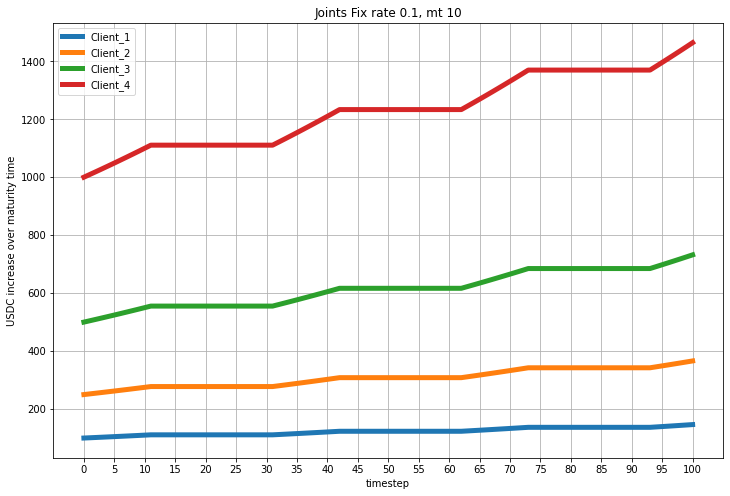

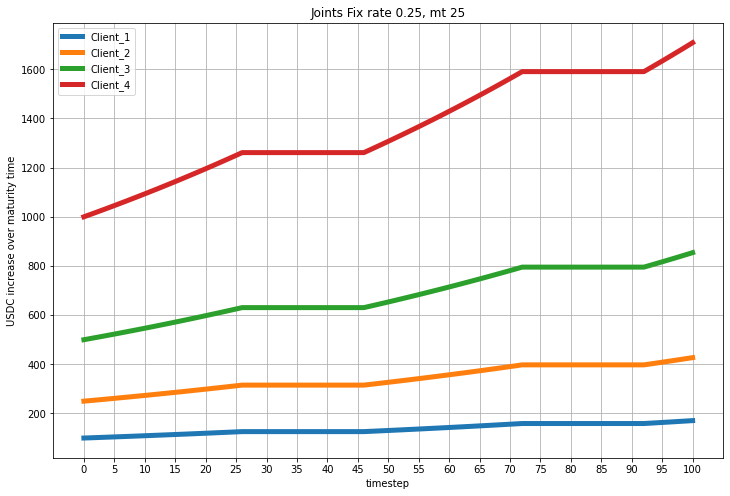

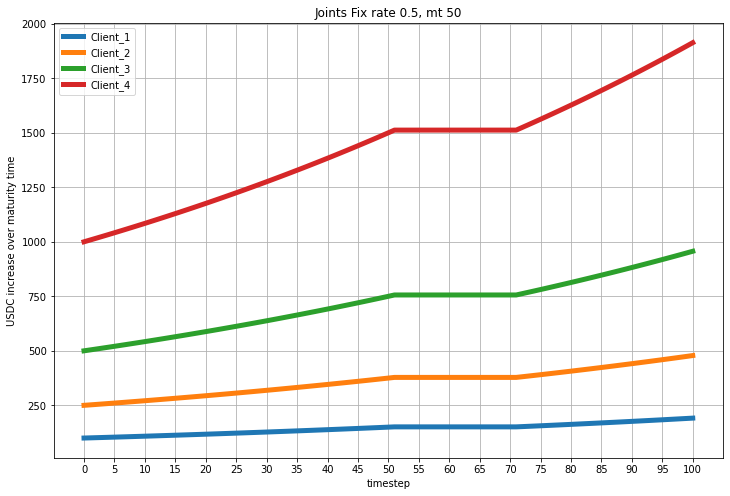

In [5]:
for ir, mt, subset in zip([0.1, 0.25, 0.5], [10, 25, 50], df.subset.unique()):
    ax = df[(df['subset'] == subset) & (df['run'] == subset + 1)].plot(x='timestep',
                                                                       y=["Client_1", "Client_2", "Client_3",
                                                                          "Client_4"], markersize=12,
                                                                       linewidth=5, figsize=(12, 8),
                                                                       title="Joints Fix rate {}, mt {}".format(ir,mt),
                                                                       ylabel='USDC increase over maturity time',
                                                                       grid=True, fillstyle='none',
                                                                       xticks=list(range(0, 101, 5)))